# Adult-PMR3508

## Gustavo Lopes Oliveira
### 10335490 - Hash 52

## 0. Contexto

Este projeto se trata de um exercício-programa desenvolvido para a disciplina PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões da Escola Politécnica da USP. Nele, o dataset **Adult** fornecido pela UCI (University of California Irvine) é utilizado para o desenvolvimento de um classificador de renda de adultos baseado nas features disponível no dataset.

**Objetivo:** Criação de um classificador knn que a partir das outras features disponíveis no dataset **Adult** seja capaz de classificar se a variável *income* é **<=50k** ou **>50k**. Além disso, será feita a exploração dos dados, com o intuito de observar e visualizar quais valores as variáveis do dataset assuem e também a avaliação do impacto da seleção de variáveis, feature engineering e seleção do parâmetro K do classificador sober a acurácia do mesmo.

## 1. Exploração dos dados

Inicialmente, será feita a importação das bibliotecas necessárias:
* **sklearn:** Biblioteca de aprendizado de máquinas open-source.
* **numpy:** Biblioteca focada na utilização de arrays multidimensionais e matrizes, além de inúmeras funções matemáticas.
* **pandas:** Biblioteca utilizada para manipulação e análise de dados.
* **seaborn:** Biblioteca com ferramentas para visualização de dados.
* **matplotlib:** Biblioteca com ferramentas para visualização de dados.

O dataset ***Adult*** traz dados sobre adultos de diversos países, ocupações, idades, etc além de uma feature *income* que classifica a renda dos adultos.



In [1]:
import sklearn
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

A função *read_csv* da biblioteca *pandas* será utilizada com o intuito de transformar os dados presentes no arquivo de treinamento train_data.csv em um dataframe característico da biblioteca.

In [2]:
data = pandas.read_csv('data/train_data.csv')

A classe *head()* será utilizada para oferecer uma pré-visualização do dataset, permitindo verificar suas features.

In [3]:
data.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


A propriedade *dtypes* traz o tipo de variável de cada feature.

In [4]:
data.dtypes

Id                 int64
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Se utiliza o atributo _empty_ para verificar se existe dados faltantes no dataset. O retorno de _False_ implica na inexistêncai dos mesmos.

In [5]:
data.empty

False

### 1.1 Id

A feature **Id** armazena um inteiro que identifica a amostra. Pode ser que por conta da forma como a aquisição de dados foi realizada exista uma relação entre essa feature e a feature target, porém essa variável **não** será utilizada no desenvolvimento do classificador, uma vez que não traz dados sobre a amostra, apenas a identifica.

### 1.2 Age

A feature **age** armazena a informação sobre a idade da pessoa entrevistada. Utiliza-se a função _describe()_ para obter informações básicas sobre a variável.

In [6]:
data["age"].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

A função _hist(bins=n)_ plota um gráfico de histograma separado em ___n___ classes.

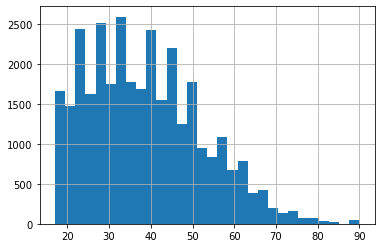

In [7]:
a = data["age"].hist(bins=30)

### 1.3 Workclass

A feature **workclass** traz informação sobre a classe de trabalho da pessoa entrevistada. A função *value_counts().plot.bar()* será utilizada com o intuito de resumir as informações encontradas nessa feature em um gráfico de barras.

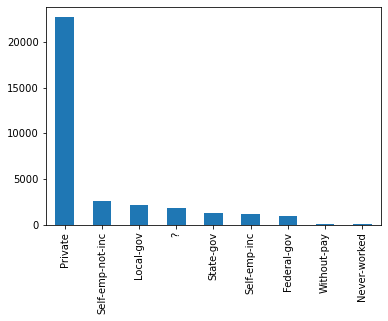

In [8]:
a = data["workclass"].value_counts().plot.bar()

Além das classes cujo nome descreve do que se trata, existe a classe "?" que indica a ausência da informação.

### 1.4 Fnlwgt

Essa variável representa a quantidade de pessoas na população que se enquadram nas características do indivíduo analisado.



In [9]:
data["fnlwgt"].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

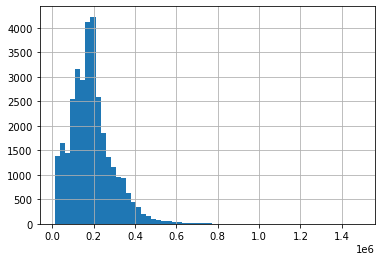

In [10]:
a = data["fnlwgt"].hist(bins=60)

### 1.5 Education

Traz a informação sobre o nível de escolaridade do indíviduo entrevistado.

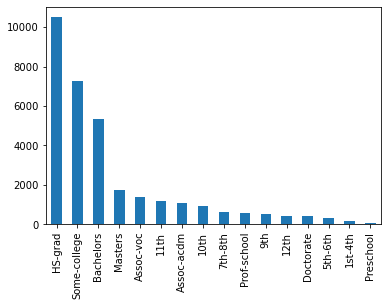

In [11]:
a = data["education"].value_counts().plot.bar()

### 1.6 Education-num

Variável criada a partir da informação presente na variável **education**, transformando-a em um equivalente numérico, determinado pelos autores do dataset.


Nesse caso, o uso da estatística descritiva e do histograma não faz muito sentido.

### 1.7 Marital Status

Traz a informação do estado civil do entrevistado.

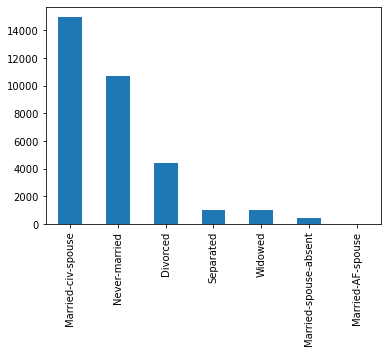

In [12]:
a = data["marital.status"].value_counts().plot.bar()

### 1.8 Occupation

Traz a informação sobre a ocupação do entrevistado.

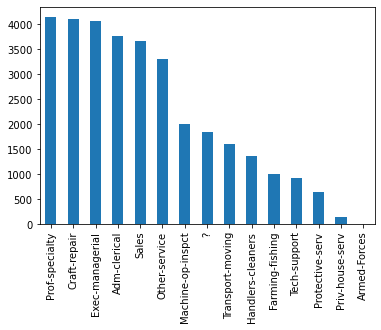

In [13]:
a = data["occupation"].value_counts().plot.bar()

### 1.9 Relationship

Traz a informação sobre a posição do indivíduo em sua família.

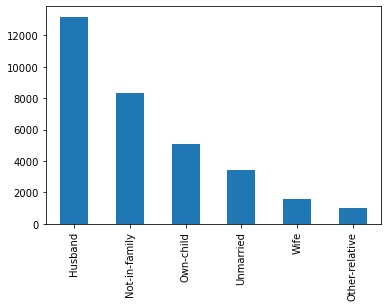

In [14]:
a = data["relationship"].value_counts().plot.bar()

### 1.10 Race

Traz a informação sobre a raça do individuo entrevistado.

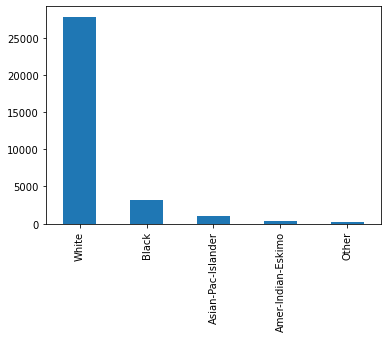

In [15]:
a = data["race"].value_counts().plot.bar()

In [16]:
data["race"].value_counts()/data["race"].count() # Cálculo da proporção de cada raça

White                 0.854269
Black                 0.095946
Asian-Pac-Islander    0.031910
Amer-Indian-Eskimo    0.009552
Other                 0.008323
Name: race, dtype: float64

### 1.11 Sex

Traz a informação sobre o sexo do entrevistado.

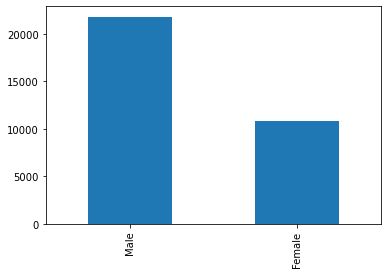

In [17]:
a =  data["sex"].value_counts().plot.bar()

In [18]:
data["sex"].value_counts()/data["sex"].count() # Cálculo da proporção de cada sexo

Male      0.669195
Female    0.330805
Name: sex, dtype: float64

### 1.12 Capital gain

Essa variável traz a informação sobre os ganhos provenientes de investimentos do entrevistado.

In [19]:
data["capital.gain"].describe()

count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

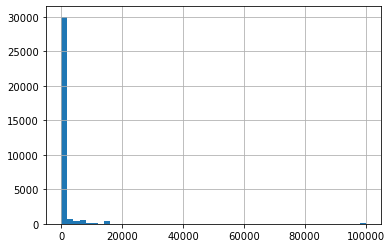

In [20]:
a = data["capital.gain"].hist(bins=50)

### 1.13 Capital loss

Essa variável traz a informação sobre as perdas provenientes de investimentos do entrevistado.

In [21]:
data["capital.loss"].describe()

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

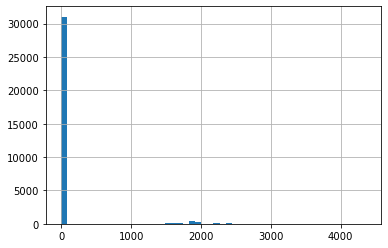

In [22]:
a = data["capital.loss"].hist(bins=50)

### 1.13 Hours per week

Traz a informação sobre a quantidade de horas que o entrevistado trabalha por semana.

In [23]:
data["hours.per.week"].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

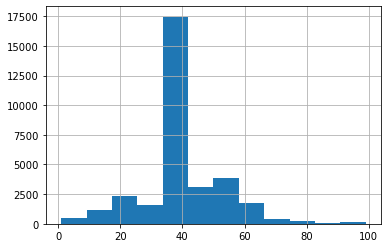

In [24]:
a = data["hours.per.week"].hist(bins=12)

### 1.14 Native country

Traz a informação sobre o país em que o entrevistado nasceu. Utiliza-se escala logarítmica no eixo vertical para melhor visualização dos dados.

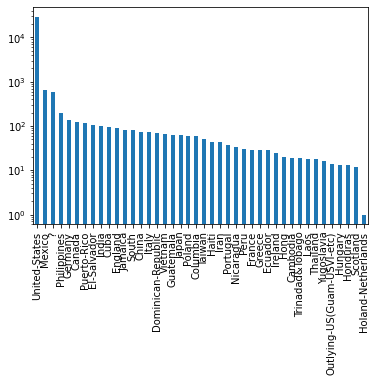

In [25]:
a = data["native.country"].value_counts().plot.bar(logy=True)

In [26]:
data["native.country"].value_counts()/data["native.country"].count()

United-States                 0.895854
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004208
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003256
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

### 1.15 Income

Essa variável traz a informação sobre a renda anual do indivíduo, classificando se ela é **maior** ou **menor ou igual** a 50 mil dólares.

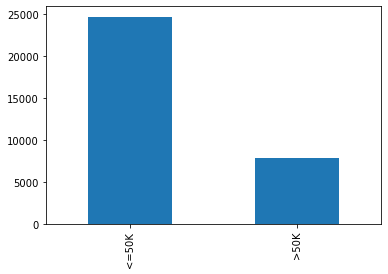

In [27]:
data["income"].value_counts().plot.bar()

In [28]:
data["income"].value_counts()/data["income"].count()

<=50K    0.759183
>50K     0.240817
Name: income, dtype: float64

## 2 Avaliação do impacto das variáveis

### 2.1 Análise univariada

A análise univariada busca trazer informações sobre o comportamento das variáveis por si só, ou seja, sem analisar sua interação com as outras.

#### 2.1.1 Variáveis numéricas

* **Age:** A idade dos entrevistados apresenta uma distribuição com média de 38,6 anos e desvio padrão de 13,64 anos. 
* **Fnlwgt:**  A maior parte dos dados se encontra abaixo de 2e05.
* **Capital gain** e **Capital loss**: A maior parte dos valores para essas duas variáveis são 0, como visto abaixo.


In [29]:
data[data==0].count()/data.count() # Calcula a porcentagem de zeros nos dados


Id                0.000000
age               0.000000
workclass         0.000000
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.916738
capital.loss      0.953348
hours.per.week    0.000000
native.country    0.000000
income            0.000000
dtype: float64

* **Hours per week**: A maior parte dos entrevistados trabalha em jornadas próximas a 40h semanais.

#### 2.1.2 Variáveis categóricas

* **Workclass**: A maior parte dos entrevistados trabalha para o setor privado.
* **Education**: Os resultados se assemelham aos encontrados em https://educationdata.org/education-attainment-statistics, com uma maior proporção de formados no ensino médio o que pode ser um indicativo de que o dataset é bastante representativo dos EUA do ponto de vista de nivel de escolaridade.
* **Marital Status**: A maior parte dos entrevistados é casada, seguido por aqueles não casados. Se assemelha aos dados encontrados em https://www.statista.com/statistics/242030/marital-status-of-the-us-population-by-sex/.
* **Relationship**: Os resultados visualizados para essa variável já indicam o desbalanceamento entre pessoas do sexo masculino e feminino entrevistadas.
* **Race**: A proporção de pessoas brancas entrevistadas é significantemente superior à proporção racial dos Estados Unidos da América, país nativo da maioria (89,6%) dos entrevistados, como é visualizado em https://www.britannica.com/place/United-States/People.
* **Sex**: Há um desbalanceamento visível entre os dois sexos. Para uma proporção que deveria ser próxima de 50-50, de acordo com https://www.statista.com/statistics/241495/us-population-by-sex/, o dataset traz cerca de 67% de homens dentre as pessoas entrevistadas. No entanto, uma pesquisa rápida indicou que, ainda que a proporção de gêneros dentre os trabalhadores estadunidenses ainda seja relevante, ela já foi muito maior e essa pode ser a justificativa do desbalanceamento.
* **Country**: Quase 90% dos entrevistados são nativos dos EUA, o que condiz com a fonte dos dados, que são baseados no censo estadunidense.
* **Income**: Mais de 75% das pessoas tem uma renda anual menor que 50k dólares.


### 2.2 Análise bivariada

Por meio de análises bivariadas busca-se avaliar a possíveis correlações entre pares de variáveis.

#### 2.2.1 Age x Income

É esperado que a feature de idade possa explicar, de alguma forma, se a pessoa tem uma renda superior ou inferior a 50k ao ano. Utiliza-se a feature ___income.numeric___ para traduzir numericamente a feature ___income___. A figura abaixo traz a correlação entre as variáveis.

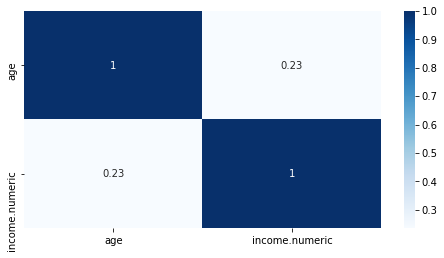

In [30]:
data["income.numeric"] = np.where(
    data['income'] ==">50K", 1, 0) 
data_biv1 = data[['age','income.numeric']]
fig, ax = plt.subplots(figsize = (8, 4))
a = sns.heatmap(data_biv1.corr(),annot=True,cmap="Blues",ax=ax)

#### 2.2.2 Education.num x Income

Por meio da feature _education.num_, que traduz numericamente o nível de escolaridade do entrevistado, é analisada a correlação entre educação e renda.

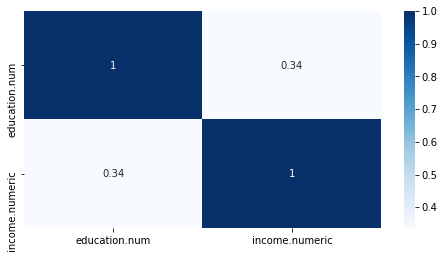

In [31]:
data_biv2 = data[['education.num','income.numeric']]
fig, ax = plt.subplots(figsize = (8, 4))
a = sns.heatmap(data_biv2.corr(),annot=True,cmap="Blues",ax=ax)

#### 2.2.3 Sex x Income

A diferença de ganhos entre os diferentes gêneros ainda é notória nos dias de hoje. Por meio da variável _is.man_ busca-se avalair a correlação entre o sexo do entrevistado e sua renda.

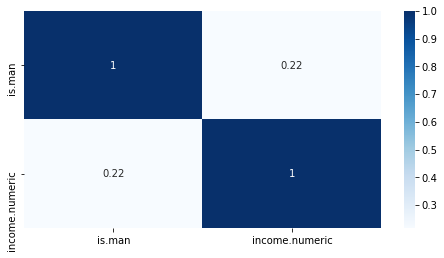

In [32]:
data["is.man"] = np.where(
    data["sex"] =="Male", 1, 0) 
fig, ax = plt.subplots(figsize = (8, 4))
data_biv3 = data[["is.man","income.numeric"]]
sns.heatmap(data_biv3.corr(),annot=True,cmap="Blues",ax=ax)

### 2.2.4 Race x Income

Busca-se avaliar o quanto o pertencimento à raçã majoritária na pesquisa (branca) pode ter correlação com a renda.

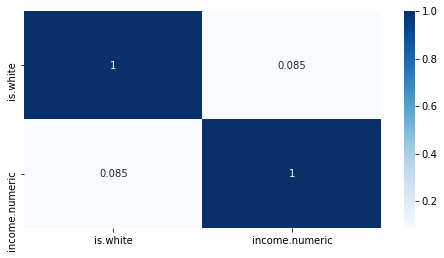

In [33]:
data["is.white"] = np.where(
    data["race"] =="White", 1, 0) 
fig, ax = plt.subplots(figsize = (8, 4))
data_biv4 = data[["is.white","income.numeric"]]
sns.heatmap(data_biv4.corr(),annot=True,cmap="Blues",ax=ax)

### 2.3 Análise Multivariada

Nessa fase será desenvolvido um heatmap das correlações entre as variáveis numéricas e as variáveis que foram traduzidas numericamente nos passos anteriores (*income.numeric*, *is.man* e *is.american*). Para isso, cria-se o dataframe *data_num*, que cntém apenas as features numéricas, excluindo, assim, as categóricas.

In [34]:
data_num = data.select_dtypes(exclude=['object']).drop(['Id'],axis=1) # Remove-se a feature Id por comodidade

data_num.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income.numeric,is.man,is.white
0,34,204991,10,0,0,44,0,1,1
1,58,310085,6,0,0,40,0,1,1
2,25,146117,10,0,0,42,0,1,1
3,24,138938,10,0,0,40,0,0,1
4,57,258883,9,5178,0,60,1,1,1


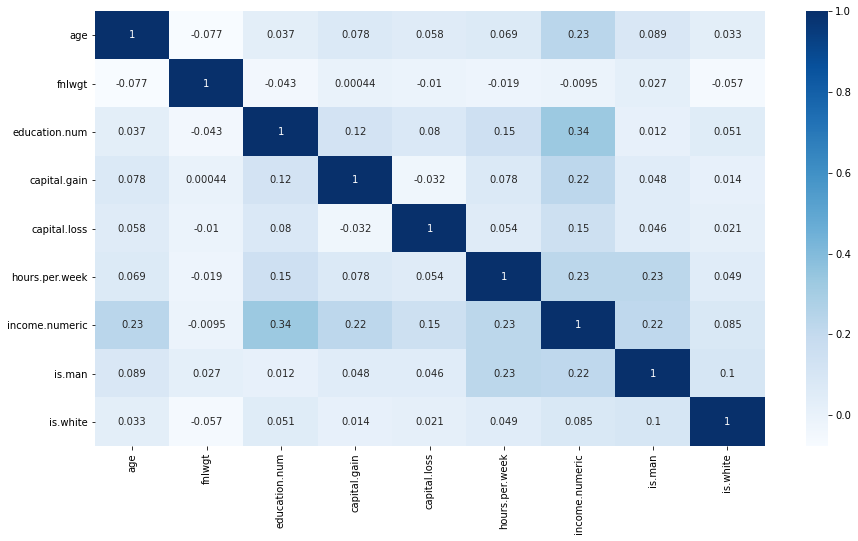

In [35]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(data_num.corr(),annot=True,cmap="Blues", ax= ax)

Algumas correlações com a renda que não foram visualizadas nas análises bivariadas foram visualizadas por meio do heatmap:

* **hours.per.week:** Existe uma correlação significante entre as horas trabalhadas por semana e a renda.

O uso da análise multivariada permite, além de uma visão mais ampla da relação entre as features e feature a ser classificada, a visualização de correlações entre as features.

## 3. Feature engineering

As features que serão utilizadas para desenvolvimento do classificador são:

* **Age:** Será normalizado.
* **Education.num:** Será normalizado.
* **Hours.per.week:** Será normalizado
* **Is.man:** Não precisa de normalização.
* **Workclass:** Será transformada em 3 features: _is.private, *is.public* e is.selfemp_.

Seguem alguns comentários que justificam a não utilização das outras features:

* **Id:** Como citado inicialmente, essa feature não traz informação sobre a amostra, apenas a identifica, portanto não deve ser utilizada no classificador.
* **Fnlwgt:** Será desconsiderado por sua distribuição desbalanceada.
* **Marital.status:** Será desconsiderada pela grande quantidade de classes.
* **Occupation:** Será desconsiderada pela grande quantidade de classes.
* **Relationship:** Será desconsiderado pela dificuldade de agrupar as classes.
* **Race:** A análise feita na seção 2.2.4 mostrou uma correlação pequena, sendo possível desconsiderar essa feature.
* **Native.country:** Será desconsiderado por sua distribuição desbalanceada.

## 4. Data Prep

Criação das features que resumem a feature _workclass_.

In [36]:
data["is.private"] = np.where(
    data["workclass"] =="Private", 1, 0)
data["is.public"] = np.where(
    (data["workclass"] =="State-gov") | (data["workclass"] =="Federal-gov") | (data["workclass"] =="Local-gov"), 1, 0)
data["is.selfemp"] = np.where(
    (data["workclass"] =="Self-emp-not-inc") | (data["workclass"] =="Self-emp-inc"), 1, 0)

Em seguida, normalizam-se as features numéricas por meio da função _RobustScaler()_.

In [88]:
data_train = data[['age','education.num','hours.per.week','capital.gain','capital.loss','is.private','is.public','is.private','is.man']]
rs = RobustScaler()
y_train = data[['income']]
data_train1 = data_train
data_train2 = data_train.drop(['is.private','is.public','is.private'],axis=1) # Remove-se o one hot encoding de workclass
data_train3 = data_train2.drop(['capital.gain','capital.loss'],axis=1)
columns1 = data_train1.columns
print(columns1)
data_train1[columns1] = rs.fit_transform(data_train1[columns1.values])
columns2 = data_train2.columns                                                   
data_train2[columns2] = rs.fit_transform(data_train2[columns2.values])
columns3 = data_train3.columns
data_train3[columns3] = rs.fit_transform(data_train3[columns3.values])

Index(['age', 'education.num', 'hours.per.week', 'capital.gain',
       'capital.loss', 'is.private', 'is.public', 'is.private', 'is.man'],
      dtype='object')


<ipython-input-88-73b30a02d42a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train1[columns1] = rs.fit_transform(data_train1[columns1.values])
C:\Users\irong\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-88-73b30a02d42a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,age,education.num,hours.per.week,capital.gain,capital.loss,is.man
0,-0.15,0.000000,0.8,0.0,0.0,0.0
1,1.05,-1.333333,0.0,0.0,0.0,0.0
2,-0.60,0.000000,0.4,0.0,0.0,0.0
3,-0.65,0.000000,0.0,0.0,0.0,-1.0
4,1.00,-0.333333,4.0,5178.0,0.0,0.0


Opta-se pela criação de 3 datasets para treino, com diferentes features com o intuito de verificar o quanto a adiçã ode novas features permite a criação de um classificador mais preciso.

## 5 Criação do classificador

Para a criação do classificador knn será utilizada a função _KNeighborsClassifier()_. O algoritmo K Nearest Neighbors se baseia na busca pelas amostras mais próximas à amostra que se está predizendo. A classe predominante das ___k___ amostras mais próximas será indicada como a classe da amostra analisada. Desas forma, o parâmetro ___k___ deve ser setado com o intuito de garantir uma boa acurácia do classificador. Assim, se usa, além da função _KNeighborsClassifier()_ para criação do classificador, a função _GridSearchCV()_, que permite a avaliação do classificador baseado em diferentes parâmetros.

In [89]:
estimator_KNN = KNeighborsClassifier(algorithm='auto') # Criação do classificador
parameters_KNN = {
    'n_neighbors': [15,18,20,23,25]} # Parâmetros que serão variados
grid_search_KNN1 = GridSearchCV( 
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_KNN2 = GridSearchCV( 
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_KNN3 = GridSearchCV( 
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

Para o primeiro dataset de treino:

In [56]:
KNN_1 = grid_search_KNN1.fit(data_train1, y_train) # Treinamento dos classificadores com os dados de teste
print(grid_search_KNN1.best_params_ ) # Mostra o parâmetro k que resultou na maior acurácia
print('Best Score - KNN:', grid_search_KNN1.best_score_ ) # Mostra a maior acurácia obtida

C:\Users\irong\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 20}
Best Score - KNN: 0.8449631449631451


Para o segundo dataset de treino:

In [90]:
KNN_2 = grid_search_KNN2.fit(data_train2, y_train) # Treinamento dos classificadores com os dados de teste
print(grid_search_KNN2.best_params_ ) # Mostra o parâmetro k que resultou na maior acurácia
print('Best Score - KNN:', grid_search_KNN2.best_score_ ) # Mostra a maior acurácia obtida

C:\Users\irong\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 25}
Best Score - KNN: 0.8461916461916463


Para o terceiro dataset de treino:

In [61]:
KNN_3 = grid_search_KNN3.fit(data_train3, y_train.values) # Treinamento dos classificadores com os dados de teste
print(grid_search_KNN3.best_params_ ) # Mostra o parâmetro k que resultou na maior acurácia
print('Best Score - KNN:', grid_search_KNN3.best_score_ ) # Mostra a maior acurácia obtida

C:\Users\irong\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 25}
Best Score - KNN: 0.804914004914005


Como visto, o dataset _data_train2_ foi o que obteve maior acurácia, utilizando um classificador knn com k = 20. Assim, esse classificador será utilizado para predizer os dados de teste. Para isso, precisa-se preparar o dataset de teste (*data_test*) para a realização da predição.

In [76]:
data_t = pandas.read_csv('data/test_data.csv') # Dataset proveniente do .csv
data_test = data_t[['Id','age','education.num','hours.per.week','capital.gain','capital.loss']] # Criação do dataser preparado.
data_test["is.man"] = np.where(
    data_t["sex"] =="Male", 1, 0) 
columns = data_test.columns                                                   
data_test[columns] = rs.fit_transform(data_test[columns.values])


<ipython-input-76-664b11be2594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["is.man"] = np.where(
<ipython-input-76-664b11be2594>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[columns] = rs.fit_transform(data_test[columns.values])
C:\Users\irong\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Com o dataset preparado, o arquivo .csv com as previsões é gerado.

In [80]:
knn_pred = KNeighborsClassifier(n_neighbors=20)
knn_pred.fit(data_train2,y_train)
data_t['income'] = knn_pred.predict(data_test.drop(columns = 'Id'))

<ipython-input-80-5401278820c3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_pred.fit(data_train2,y_train)


In [91]:
data_t.head()
data_t[['Id', 'income']].to_csv("submission.csv", index = False)

A acurácia obtida após submissão no kaggle foi de 84,86%.

## 6 Conclusão

Algumas conclusões podem ser tomadas a partir dos reultados obtidos e também pelo caminho que se levou até a obtenção deles.

* A exploração das variáveis é um processo muito importante. Conhecer o que os dados trazem, os valores que eles podem assumir, ter ideias básicas sobre sua distribuição é muito importante. Para isso, funções como _describe()_, *plot.bar()*, *value_counts()* e _hist()_ são úteis para oferecer informações valiosas sobre uma grande quantidade de dados, seja em formato de texto ou por elementos gráficos.
* A análise univariada é essencial para a detecção de outliers e desbalanceamentos no dataset.
* A análise bivariada é importante para uma primeira análise sobre a forma como as features estão relacionadas com a feature target e até mesmo entre si (o que acabou não sendo feito nesse trabalho). A percepção de features altamente correlacionadas possibilita a utilização de uma menor quantidade de features no classificador com uma pequena alteração no seu resultado. a utilização de one hot encoding em variáveis categóricas pode trazer à tona resultados interessantes, como é o caso da variável _is.man_
* A análise multivariada, assim como a análise bivariada, mostra informações importantes sobre a distribuição das amostras.
* A preparação dos dados é um procedimento que deve ser feito com cuidado. Por muitas vezes o código utilizado foi alterado, modificando a maneira como a normalização era realizada no dataset, o que refletiu em uma grande melhoria na acurácia do classificador.
* O uso de um método de otimização automatizado do classificador é muito interessante para permitir a setagem dos melhores parâmetros, que, assim como a correta escolha das feeatures, é determinante para a acurácia do classificador treinado. Verifica-se o dataset *data_train2* obteve a melhor acurácia utilizando um classificador de 20 vizinhos mais próximos. Esse resultado mostra que, em alguns casos, a utilização de one hot encoding em variáveis categóricas que não possuem grande capacidade de predizer a feature target pode ser até mesmo prejudicial ao modelo.

